In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load the data
df = pd.read_csv("d:/Datamites/Projects/cus_seg/data/processed/mergedfile.csv")
df.head()

,Invoice_Date,Invoice_No,Customer_Id,Gender,Age,Shopping_Mall,Category,Quantity,Price,Payment_Method,Sales_Amount
0,2022-07-10,I100008,C199951,Male,65,Emaar Square Mall,Clothing,5,"1,500",Cash,"7,502"
1,2021-06-18,I100014,C138893,Male,55,Viaport Outlet,Cosmetics,5,203,Cash,"1,016"
2,2021-03-04,I100015,C132779,Female,35,Mall of Istanbul,Clothing,2,600,Debit Card,"1,200"
3,2023-01-05,I100024,C244411,Female,67,Emaar Square Mall,Books,3,45,Credit Card,136
4,2022-05-18,I100027,C150002,Female,19,Mall of Istanbul,Technology,4,"4,200",Cash,"16,800"


In [25]:
# Check the total number of rows and columns
print(len(df))
print(df.shape)

99457
(99457, 11)


In [26]:
# Q1. How is the shopping distribution according to gender?

gender_totals = df.groupby('Gender')['Sales_Amount'].sum()
gender_percentage = (gender_totals / gender_totals.sum()) * 100

print(gender_percentage)

Gender
Female   60
Male     40
Name: Sales_Amount, dtype: float64


In [27]:
# Q2. Which gender did we sell more products to?

gender_sales = df.groupby('Gender')['Quantity'].sum().sort_values(ascending=False)
top_gender = gender_sales.idxmax()
top_quantity = gender_sales.max()

print(f"We sold the most products to {top_gender} customers, with a total of {top_quantity} items sold.")

We sold the most products to Female customers, with a total of 178659 items sold.


In [30]:
# Q3. Which gender generated more revenue?

gender_revenue = df.groupby('Gender')['Sales_Amount'].sum().sort_values(ascending=False)
top_gender = gender_revenue.idxmax()
top_revenue = gender_revenue.max()

print(f"{top_gender} customers generated the most revenue: ₹{top_revenue:,.2f}")

Female customers generated the most revenue: ₹150,207,136.02


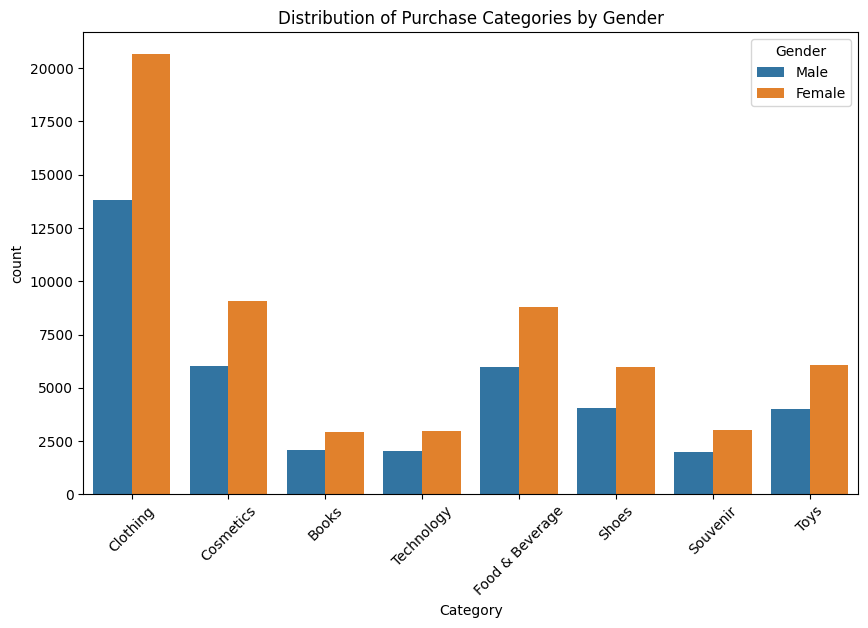

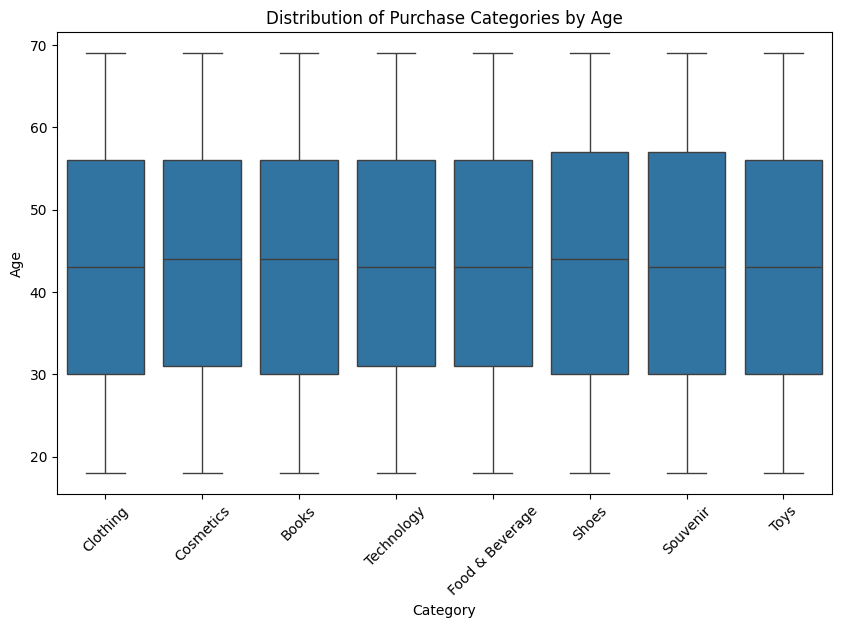

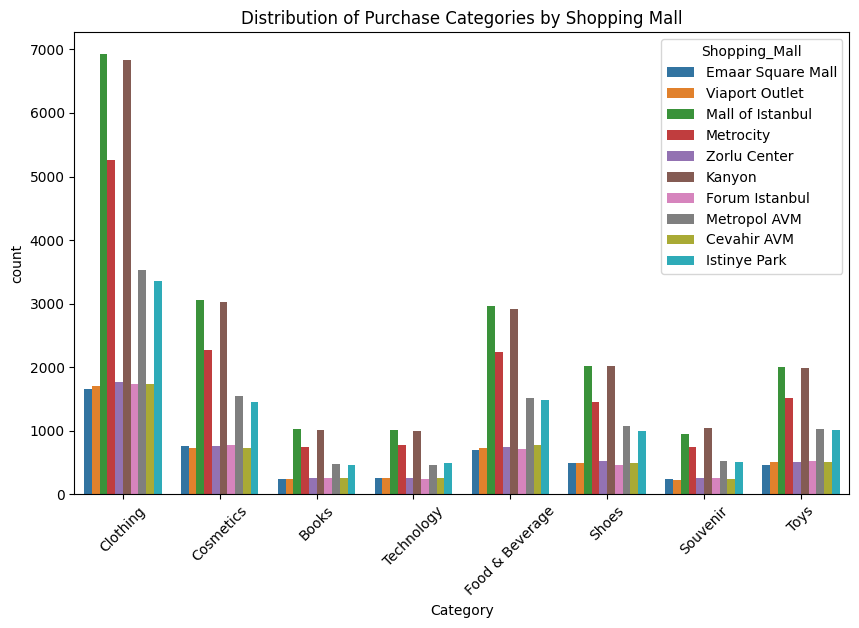

In [40]:
# Q4. Distribution of purchase categories relative to other columns?

# Distribution of Categories relative to Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', hue='Gender')
plt.title('Distribution of Purchase Categories by Gender')
plt.xticks(rotation=45)
plt.show()

# Distribution of Categories relative to Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Age')
plt.title('Distribution of Purchase Categories by Age')
plt.xticks(rotation=45)
plt.show()

# Distribution of Categories relative to Shopping Mall
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', hue='Shopping_Mall')
plt.title('Distribution of Purchase Categories by Shopping Mall')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Q5. How is the shopping distribution according to age?

69


C:\Users\sanka\AppData\Local\Temp\ipykernel_4980\4076201592.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_shopping_distribution = df.groupby('Age_Group')['Sales_Amount'].sum().reset_index()


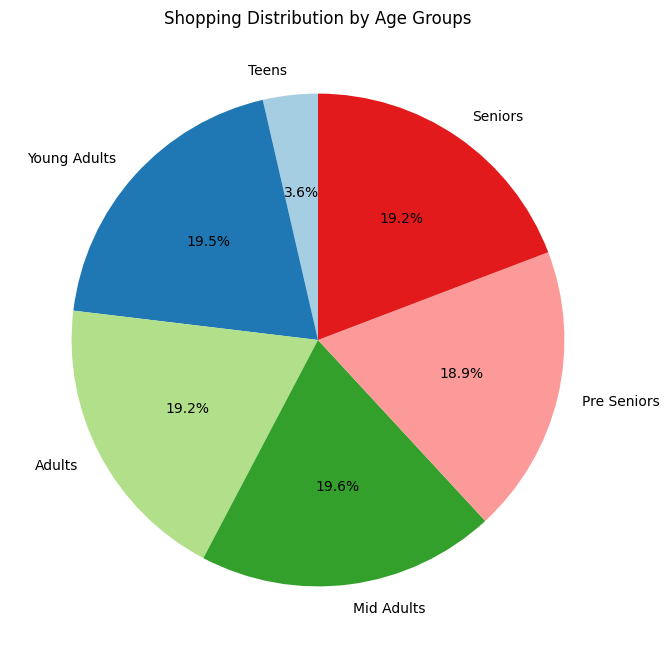

In [51]:
# Create the Age_Group column along with defining the age groups
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['Teens', 'Young Adults', 'Adults', 
              'Mid Adults', 'Pre Seniors', 'Seniors']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Aggregate shopping data by Age_Group (e.g., Sales_Amount)
age_shopping_distribution = df.groupby('Age_Group')['Sales_Amount'].sum().reset_index()

# Plotting as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_shopping_distribution['Sales_Amount'], 
        labels=age_shopping_distribution['Age_Group'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors)  # Color palette for better visualization

plt.title('Shopping Distribution by Age Groups')
plt.show()

In [55]:
# Q6. Which age cat did we sell more products to?

# Group data by Age_Group and calculate total Quantity
age_group_sales = df.groupby('Age_Group')['Quantity'].sum().reset_index()

# Find the age group with the maximum Quantity sold
max_sales_age_group = age_group_sales.loc[age_group_sales['Quantity'].idxmax()]

print("We sold highest number of products", max_sales_age_group['Quantity'], "to ", max_sales_age_group['Age_Group'])

We sold highest number of products 57949 to  Young Adults


C:\Users\sanka\AppData\Local\Temp\ipykernel_4980\3232147777.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age_Group')['Quantity'].sum().reset_index()


In [ ]:
# Q7. Which age cat generated more revenue?

In [59]:
# Group data by Age_Group and calculate total Quantity
age_group_sales = df.groupby('Age_Group')['Sales_Amount'].sum().round(0).reset_index()

# Find the age group with the maximum Quantity sold
max_sales_age_group = age_group_sales.loc[age_group_sales['Sales_Amount'].idxmax()]

print("The highest revenue of ", max_sales_age_group['Sales_Amount'], "rs is generated from ", max_sales_age_group['Age_Group'])

The highest revenue of  49234368.0 rs is generated from  Mid Adults


C:\Users\sanka\AppData\Local\Temp\ipykernel_4980\2605851075.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age_Group')['Sales_Amount'].sum().round(0).reset_index()


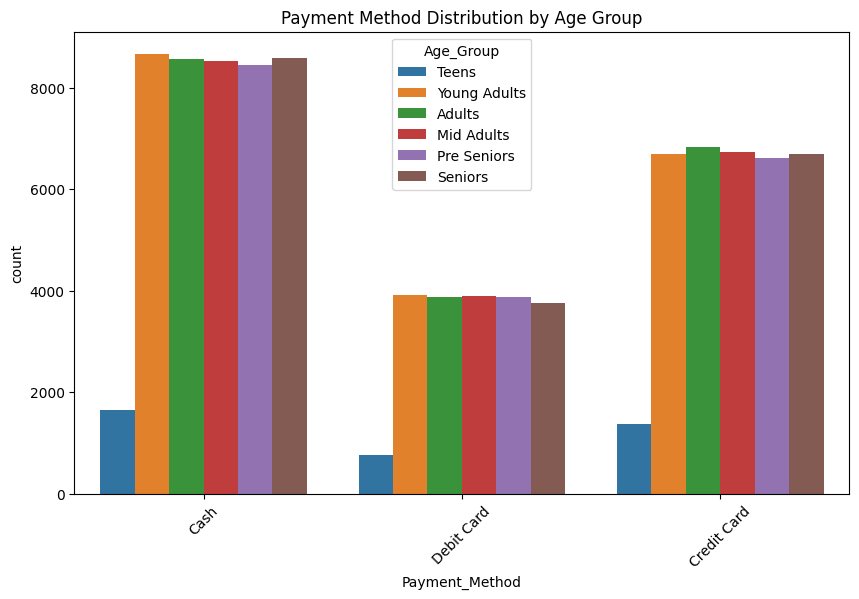

In [ ]:
# Q8. Does the payment method have a relation with other columns?

# Payment Method vs Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment_Method', hue='Age_Group')
plt.title('Payment Method Distribution by Age Group')
plt.xticks(rotation=45)
plt.show()

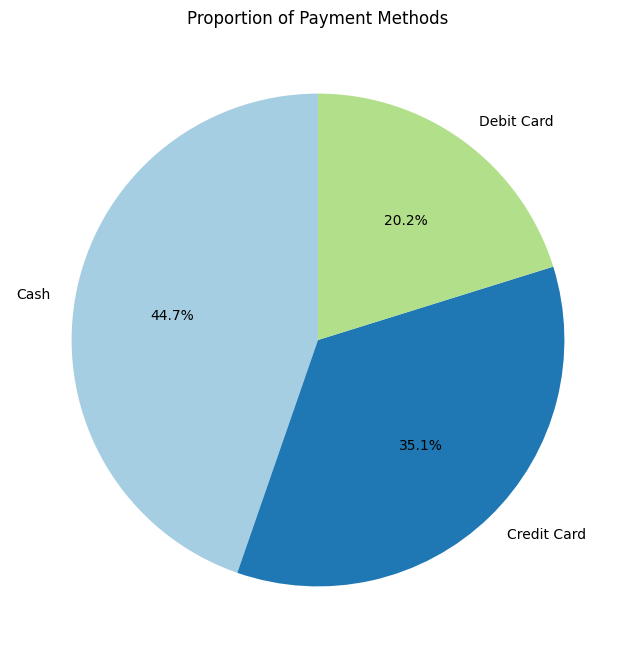

In [ ]:
# Q9. How is the distribution of the payment method?

payment_distribution = df['Payment_Method'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_distribution.values, 
        labels=payment_distribution.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors)
plt.title('Proportion of Payment Methods')
plt.show()